# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The SVM is a supervised machine learning algorithm mostly used in classification which can also be adapted to regression problems.

It is a binary classifier which works by fitting a hyperplane to split samples into 2 subspaces such that each subspace contains points from only 1 of 2 classes. New points are then classified based on which side of the hyperplane they lie. The optimal fit is chosen as the plane which maximises the distance between the dividing line and the closest data points on either side.

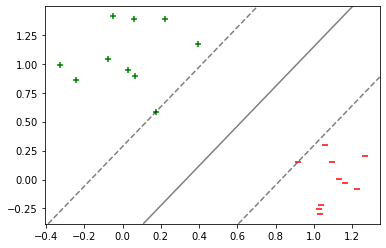

In [2]:
from sklearn import svm

x = np.append(np.random.multivariate_normal([0, 1], [[0.05,0],[0,0.05]], 10),
             np.random.multivariate_normal([1, 0], [[0.05,0],[0,0.05]], 10), axis=0)
y = np.zeros(20)
y[10:] = 1

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x, y)

plt.scatter(x[:10,0], x[:10,1], marker="+", c='g')
plt.scatter(x[10:,0], x[10:,1], marker="_", c='r')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

The best fit is the line/plane which maximises the distance on either side to the closest data points. The key to the SVM is that only the points closest to either side of the dividing line (the support vectors) are considered when optimising the fit. Points further away from the dividing line do not have an affect on the loss function. SVMs belong to a class known as maximum margin classifiers.

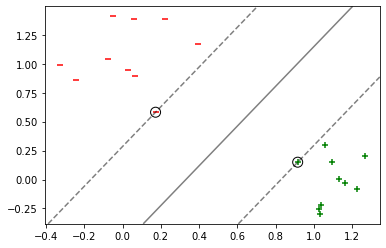

In [3]:
plt.scatter(x[10:,0], x[10:,1], marker="+", c='g')
plt.scatter(x[:10,0], x[:10,1], marker="_", c='r')
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

The fit is optimised using only the support vectors which are the points closest to the decision boundary. For this reason, support vector machines are very efficient in high demensional spaces compared to other linear classifiers.

There are however 2 major caveats to consider. The first is that data must be linearly seperable for the SVM to work. In cases where calsses cannot be separated by a hyperplane, the kernel trick may be used. Secondly, the SVM is strictly binary in its classification capabilities. For multiclass classification, multiple binary classifiers must be combined (natively multiclass SVMs have been proposed but are not common, the one vs many binary classification is usually the best approach when using SVMs). Additonally, unlike, eg logistic regression, class probabilities cannot be directly inferred from the classifier. Probabilistic modifications to the SVM do exist.

In the case of linearly seperable data, the SVM hyperplane is defined as $$\bar w\cdot\bar x+b = 0$$.

There are 2 criteria which must be satisfied whe optmising the SVM. First, positive and negative classes should lie on different sides of the decision baoundary, or
$$y_i(\bar w\cdot\bar x+b) \gt 0$$
where $y_i$ is +1 for positive samples and -1 for negatice samples.

Secondly, the boundary should be as far away as possible from the closest points on either side. The distance from the boundary to the closest point is referred to as the margin, in other words, the smallest distance between the decision boundary and any of the samples. The larger the margin, theoretically, the greater the generalisation.

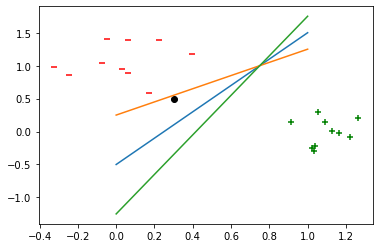

In [4]:
plt.scatter(x[10:,0], x[10:,1], marker="+", c='g')
plt.scatter(x[:10,0], x[:10,1], marker="_", c='r')

r = np.linspace(-0.5, 1.5, 2)
plt.plot(r)
plt.plot(0.5*r+0.5)
plt.plot(1.5*r-0.5)

plt.scatter([0.3],[0.5], c='black')
plt.show()

Each of the 3 lines separate the training data, but the new point (black circle) will be classified differently depending on the chosen function. The decision boundary is the exact mid point between the closetst positive sample and the closest negative sample. 

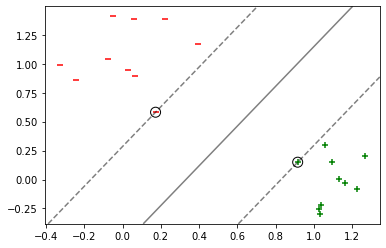

In [5]:
plt.scatter(x[10:,0], x[10:,1], marker="+", c='g')
plt.scatter(x[:10,0], x[:10,1], marker="_", c='r')
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

The optimal boundary is the one which maximises the distance from the nearest points.

#### Minimising the distance


To get the distance from a point $x_n$ to the plane, first take some point $x_p$ on the plane $wx+b=0$. The distance from $x_n$ to $x_p$ is simply $x_n - x_p$. The projection of $x_n - x_p$ onto $w$ is then the distance from $x_n$ and the plane.

To get the projection, first divide w by its norm to get the unit vector $\hat{w} = \frac{w}{||w||}$.

The inner product gives $$distance = \frac{1}{\lvert\lvert w\rvert\rvert}\lvert w^Tx_n-w^Tx\rvert$$


Because $wx_n+b$ is constrained to be equal to 1 and $x_p$ is on the plane $wx+b=0$

$$distance = \frac{1}{||w||}$$

So the optimisation problem can be defined as maximising the margin $\frac{1}{||w||}$

subject to $\underset{n=1,2,...,N}{min}|w^Tx_n+b|=1$ (ie the smallest distance between the plane and a point is 1 or the closest point is 1 unit away from the plane).

This can be hard to optimise so it is convenient to reformulate the problem as a minimisation problem:
$$\underset{w}{argmin} \frac{||w^2||}{2} $$

Reintroduting the $y_i$ label which is -1 or +1 the contraints become 
$$y_n(wx+b)\geq1$$
for all n

This is a constrained optimisation problem which can be simplified by adding Lagrangian multipliers.

The objective function needs N multipliers, making the new funtion 

$$
\begin{aligned}
 \underset{w,b,\alpha}{argmin} & \frac{w^Tw}{2}-\sum^N_{n=1}\alpha_n(y_n(wx+b)-1) \\
 \text{subject to } & \alpha_n \geq 0 \text{ for all n}
\end{aligned}
$$
($||w||^2 = w^Tw)$


The derivatives:

$$
\begin{aligned}
 \frac{\partial}{\partial w} &= w-\sum^N_{n=1} \alpha_n y_n x_n\\
 \frac{\partial}{\partial b} &= - \sum^N_{n=1} \alpha_n y_n
\end{aligned}
$$

#### Smoothing

Often it is necessary to soften the classification constraint and allow some points to be incorrectly classified. Introducing a new $\epsilon$ and $C$ where $\epsilon$ is ..... the objective becomes

$$
\begin{aligned}
 \underset{w}{argmin} & \frac{w^Tw}{2} + C \sum^N_{n=1} \epsilon_n \\
 \text{subject to } & \epsilon_n \geq 0 \text{ and } y_n(wx_n+b)\geq - \epsilon_n \text{ for all n}
\end{aligned}
$$

The parameter C controls to what extent to allow points to sit within the margin or on the wrong side of the decision boundary.